['外部', '服务专业性', '服务专业性', '精细', '外部', '服务专业性', '服务专业性', '外部', '服务专业性'] [0.36, 0.58, 1.0, 1.9500000000000002, 1.98, 2.9699999999999998, 1.0, 1.0, 0.51] ['test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test']


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (1).

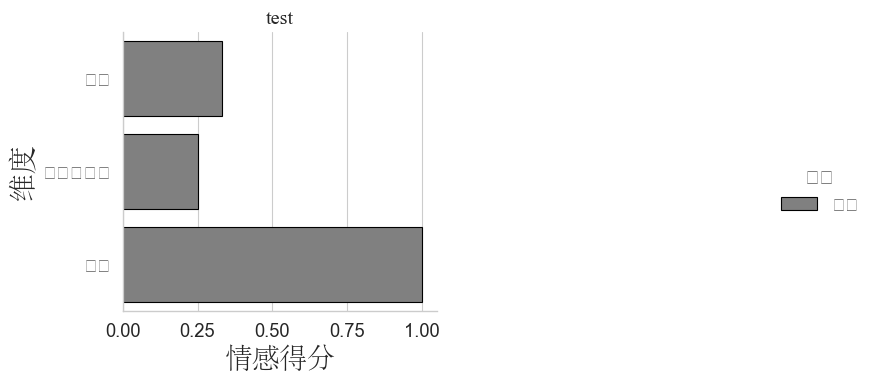

In [11]:
# 维度-情感分类可视化
import matplotlib.pyplot as plt
from matplotlib import myconfig
import seaborn as sns
import pandas as pd
config = myconfig.Config()

result=[]
pinpaiss= ['ALBD','AND','AT','BNL','GRN','LN','QPL','TB']
pinpaiss= ['test']
id2label = {k: v.strip() for k, v in enumerate(open('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\label.txt', 'r', encoding='utf-8').readlines())}
for pinpai in pinpaiss:
    with open('D:/python_common/代码_感知质量大论文/公开数据处理/感知质量数据集/维度-情感分类结果/维度-情感分类结果_'+pinpai+'.tsv','r',encoding='utf-8') as f:
        data=f.readlines()
    df=pd.DataFrame(columns=['维度','品牌','情感'])

    Weidus=[]
    Pinpais=[pinpai]*(len(data)-1)
    Qinggans=[]

    for each in data:
        ids,scores,review=each.split('\t')

        if ',' in ids:
            ids_ = ids.split(',')
            weidus = [id2label[int(i) % 12] for i in ids_]

            qinggan_ = scores.split('|')
            qinggans = []
            for each_qinggan in qinggan_:
                each_qinggan_ = each_qinggan.split(',')
                each_qinggan_ = sum([float(each_qinggan_[i])*(i+1) for i in range(0,len(each_qinggan_))])
                qinggans.append(each_qinggan_)
                Pinpais.append(pinpai)

        else:
            weidus=[id2label[int(ids)%12]]
            qinggans=[sum([float(each) for each in scores.split(',')])]
        Weidus.extend(weidus)
        Qinggans.extend(qinggans)
    print(Weidus,Qinggans,Pinpais)
    df['维度']=Weidus
    df['品牌']=Pinpais
    df['情感']=Qinggans
    result.append(df)
result=pd.concat(result);result2=result.copy()
# 根据情感值计数
result=result.value_counts(['品牌','维度','情感'],normalize=False,sort=False,ascending=True).reset_index()
result.columns=['品牌','维度','情感','数量']
result['情感得分']=result['数量']/result.groupby(['品牌','维度'])['数量'].transform('sum')
result['情感']=result['情感'].apply(lambda x:'积极' if x==3 else '消极' if x==2 else '中性')
my_palette = {"消极": "orange", "积极": "skyblue",'中性':'grey'}

# 各维度情感占比
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 0.5})
g = sns.catplot(x="情感得分", y="维度", hue="情感", col="品牌",data=result, kind="bar",height=4, aspect=1,palette=my_palette,legend=True,legend_out=True,sharey=True,sharex=True,errorbar=None,alpha=1,edgecolor='black',col_wrap=2)
g.set_xlabels('情感得分',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_ylabels('维度',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_titles("{col_name}",fontfamily = config.english_fontfamily)
g.set_yticklabels(set(weidus),fontfamily = config.chinese_fontfamily,fontsize=config.ticks_fontsize)
g.set(xlim=(0, 1))
config.dpi_for_catplot(g)
config.transform_to_percent(g)
plt.show()

# 各维度占比
result2=result2.value_counts(['品牌','维度'],normalize=False,sort=False).reset_index()
result2.columns=['品牌','维度','数量占比']
result2['数量占比']=result2['数量占比']/result2.groupby(['品牌'])['数量占比'].transform('sum')
result2=result2.sort_values(['品牌','数量占比','维度'],ascending=True)
result2.reset_index(drop=True,inplace=True)
g = sns.catplot(x="数量占比", y="维度", col="品牌",data=result2, kind="bar",height=4, aspect=1,legend=True,legend_out=True,sharey=True,sharex=False,errorbar=None,alpha=1,edgecolor='black',palette='Blues_d',col_wrap=2)

g.set_xlabels('评论占比',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_ylabels('维度',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_titles("{col_name}",fontfamily = config.english_fontfamily)
g.set_yticklabels(set(weidus),fontfamily = config.chinese_fontfamily,fontsize=config.ticks_fontsize)
config.dpi_for_catplot(g)
config.transform_to_percent(g)

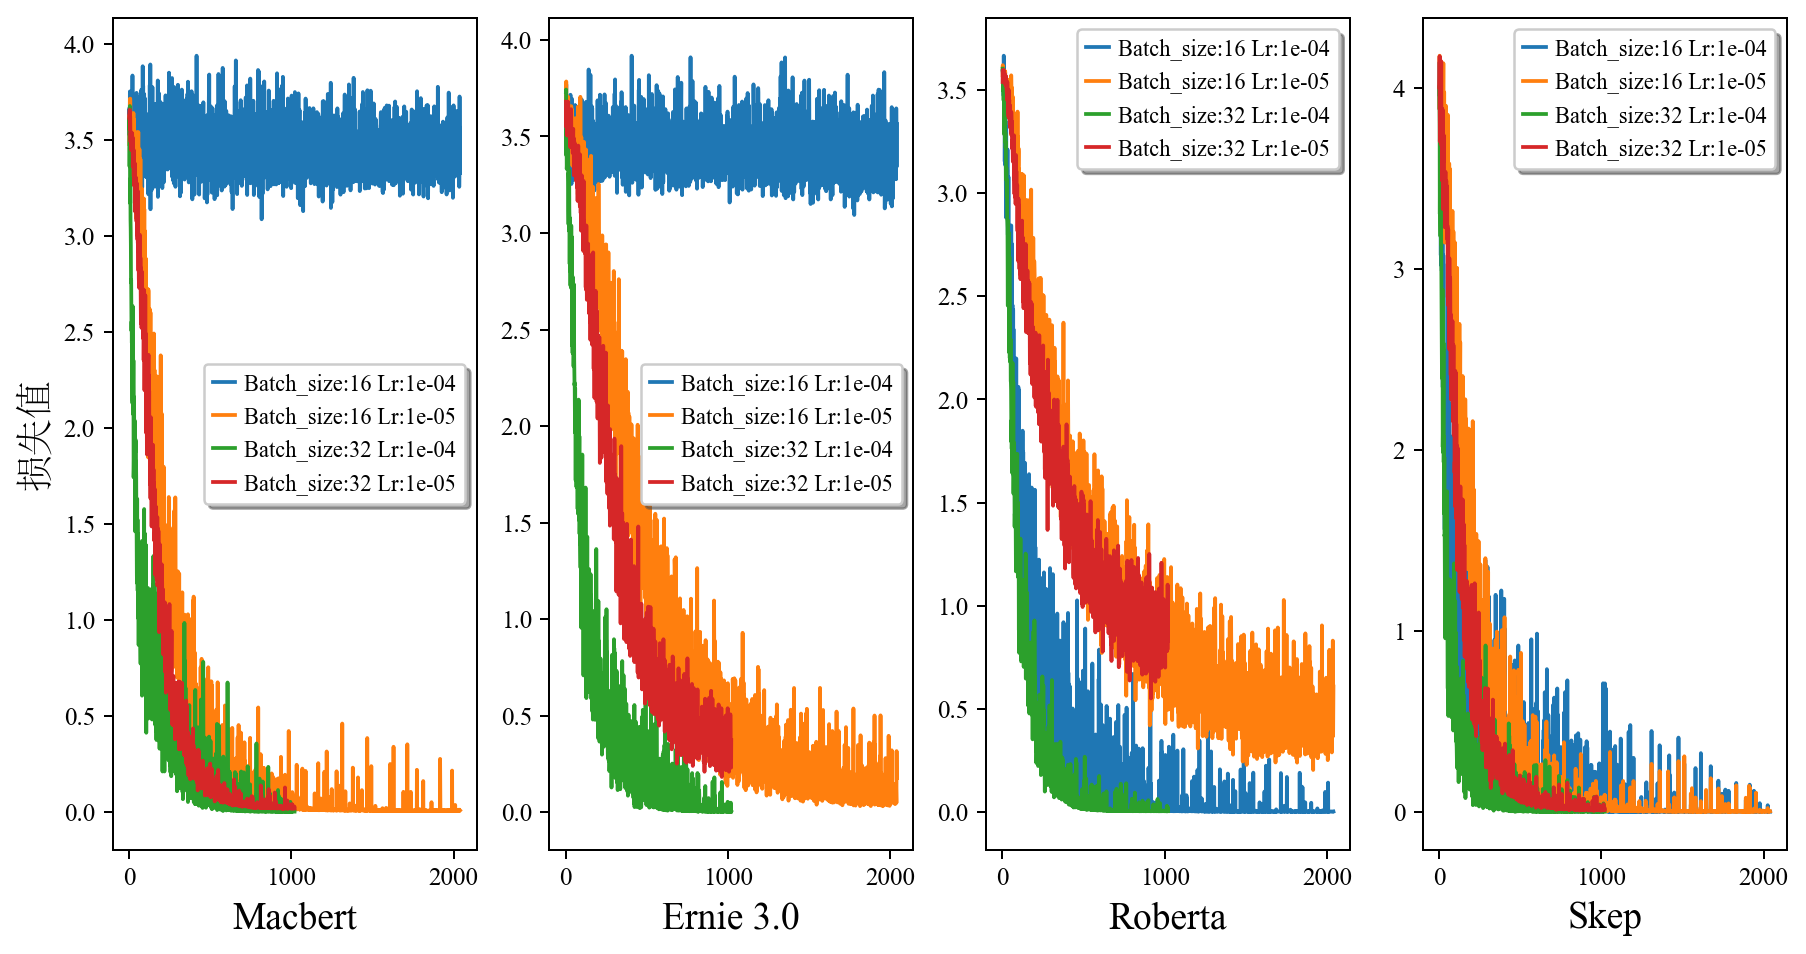

In [50]:
#分开的
import matplotlib.pyplot as plt
import pandas as pd
import warnings; warnings.filterwarnings(action='once')
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

data_bert=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'bert'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_bert=pd.concat([data_bert,data1],axis=0)

data_ernie=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'ernie'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_ernie=pd.concat([data_ernie,data1],axis=0)

data_roberta=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'roberta'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_roberta=pd.concat([data_roberta,data1],axis=0)

data_skep=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'skep'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_skep=pd.concat([data_skep,data1],axis=0)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(12, 6),dpi=180)

ax0.errorbar(data_bert['step'].tolist()[2040:4080], data_bert['value'].tolist()[2040:4080])
ax0.errorbar(data_bert['step'].tolist()[4080:6120], data_bert['value'].tolist()[4080:6120])
ax0.errorbar(data_bert['step'].tolist()[0:1020], data_bert['value'].tolist()[0:1020])
ax0.errorbar(data_bert['step'].tolist()[1020:2040], data_bert['value'].tolist()[1020:2040])
ax0.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax0.set_xlabel('Macbert',fontdict={'size': 15})
ax0.set_ylabel('损失值',fontdict={'size': 15,'fontfamily':'STsong'})


ax1.errorbar(data_ernie['step'].tolist()[2040:4080], data_ernie['value'].tolist()[2040:4080])
ax1.errorbar(data_ernie['step'].tolist()[4080:6120], data_ernie['value'].tolist()[4080:6120])
ax1.errorbar(data_ernie['step'].tolist()[0:1020], data_ernie['value'].tolist()[0:1020])
ax1.errorbar(data_ernie['step'].tolist()[1020:2040], data_ernie['value'].tolist()[1020:2040])
ax1.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax1.set_xlabel('Ernie 3.0',fontdict={'size': 15})


ax2.errorbar(data_roberta['step'].tolist()[2040:4080], data_roberta['value'].tolist()[2040:4080])
ax2.errorbar(data_roberta['step'].tolist()[4080:6120], data_roberta['value'].tolist()[4080:6120])
ax2.errorbar(data_roberta['step'].tolist()[0:1020], data_roberta['value'].tolist()[0:1020])
ax2.errorbar(data_roberta['step'].tolist()[1020:2040], data_roberta['value'].tolist()[1020:2040])
ax2.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax2.set_xlabel('Roberta',fontdict={'size': 15})


ax3.errorbar(data_skep['step'].tolist()[2040:4080], data_skep['value'].tolist()[2040:4080])
ax3.errorbar(data_skep['step'].tolist()[4080:6120], data_skep['value'].tolist()[4080:6120])
ax3.errorbar(data_skep['step'].tolist()[0:1020], data_skep['value'].tolist()[0:1020])
ax3.errorbar(data_skep['step'].tolist()[1020:2040], data_skep['value'].tolist()[1020:2040])
ax3.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax3.set_xlabel('Skep',fontdict={'size': 15})

plt.show()